In [539]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)



In [540]:
houses = pd.read_csv("houses.csv")


In [541]:
# Change column name to small letter and replace spaces with _ for easier access and typing
df_houses = houses.copy()

In [542]:
# number of developer
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             4000 non-null   object
 1   Bedroom                 4000 non-null   object
 2   Bathroom                4000 non-null   object
 3   Property Size           4000 non-null   object
 4   Nearby School           687 non-null    object
 5   Nearby Mall             365 non-null    object
 6   Ad List                 4000 non-null   int64 
 7   Category                4000 non-null   object
 8   Facilities              4000 non-null   object
 9   Building Name           4000 non-null   object
 10  Developer               4000 non-null   object
 11  Tenure Type             4000 non-null   object
 12  Address                 4000 non-null   object
 13  Completion Year         4000 non-null   object
 14  # of Floors             4000 non-null   object
 15  Tota

In [543]:
df_houses.columns = df_houses.columns.str.lower().str.replace(" ", "_")

In [544]:
# See how many houses are up for listing 
df_houses["building_name"].nunique()

1938

In [545]:
# Delete some columns that are not needed in this analysys; ["description", "ad_list", "firm_type", "firm_number", "ren_number", "park"]

to_drop = ["description", "ad_list", "firm_type", "firm_number", "ren_number", "park", "parking_lot", "bus_stop", "mall", "school"]
df_houses = df_houses.drop(columns=to_drop, axis=1)

In [546]:
# Find unique value for every column
def find_unique(df):
    for column in df.columns:
        if df[column].nunique() < 50:
            print(f"number of unique value in {column} = {df[column].nunique()}")
            print(df[column].unique())
            print()

find_unique(df_houses)

number of unique value in bedroom = 9
['4' '3' '1' '2' '5' '6' '-' '10' '8']

number of unique value in bathroom = 9
['2' '1' '3' '4' '5' '-' '6' '7' '8']

number of unique value in category = 1
['Apartment / Condominium, For sale']

number of unique value in tenure_type = 2
['Freehold' 'Leasehold']

number of unique value in completion_year = 41
['-' '2007' '2010' '2000' '2008' '2021' '2016' '1990' '1998' '2020' '2018'
 '2015' '2019' '2014' '2002' '1999' '2017' '2006' '2023' '2011' '2003'
 '2013' '2022' '1993' '1995' '1997' '2012' '1996' '2009' '2001' '2005'
 '2004' '1989' '2026' '2024' '2025' '1994' '1992' '1991' '1987' '1985']

number of unique value in property_type = 8
['Service Residence' 'Apartment' 'Flat' 'Studio' 'Condominium' 'Others'
 'Townhouse Condo' 'Duplex']

number of unique value in floor_range = 4
['-' 'Low' 'Medium' 'High']

number of unique value in land_title = 3
['Non Bumi Lot' 'Bumi Lot' 'Malay Reserved']

number of unique value in highway = 31
[nan 'SILK Sg Rama

In [547]:
df_houses_columns = df_houses.columns
df_houses_columns

Index(['bedroom', 'bathroom', 'property_size', 'nearby_school', 'nearby_mall',
       'category', 'facilities', 'building_name', 'developer', 'tenure_type',
       'address', 'completion_year', '#_of_floors', 'total_units',
       'property_type', 'floor_range', 'land_title', 'hospital', 'price',
       'highway', 'nearby_railway_station', 'railway_station'],
      dtype='object')

In [548]:
numeric_column = ['bedroom', 'bathroom', 'property_size', 'completion_year', '#_of_floors', 'total_units', 'price',]

non_numeri_column = ['nearby_school', 'nearby_mall','category', 'facilities', 'building_name', 'developer', 'tenure_type',
                    'address','property_type', 'floor_range', 'land_title', 'hospital',
                    'highway', 'nearby_railway_station', 'railway_station']

# Convert "-" to 0 for tobe numeric properties
for n_column in numeric_column:
    df_houses[n_column] = df_houses[n_column].replace("-", 0)

# Convert "-" to Unknown for tobe numeric properties
for non_column in non_numeri_column:
    df_houses[non_column] = df_houses[non_column].replace("-", "Unknown")



In [549]:
# Convert bedroom to int
df_houses["bedroom"] = df_houses["bedroom"].astype("int8")

# Convert bathroom to int
df_houses["bathroom"] = df_houses["bedroom"].astype("int8")

# Convert property size to int
df_houses["property_size"] = df_houses["property_size"].str.split(" ").str[0].astype("int")

# Convert completion_year size to Datetime.dt.year
df_houses["completion_year"].map(lambda x : pd.to_datetime(x).year if x != 0 else "unknown")

# Convert _of_floors size to int
df_houses["#_of_floors"] = df_houses["#_of_floors"].astype("int8")

# Convert total_units size to int
df_houses["total_units"] = df_houses["total_units"].astype("int16")

# Convert price size to int
df_houses["price"] = df_houses["price"].str.replace(" ","").str.replace("RM","").astype("int")



In [550]:


states = ['Johor', 'Kedah', 'Kelantan', 'Perak', 'Selangor', 'Melaka', 'Negeri Sembilan',
    'Pahang', 'Perlis', 'Penang', 'Sabah', 'Sarawak', 'Terengganu',
    'Kuala Lumpur', 'Labuan', 'Putrajaya'
]



state_list = []

for address in df_houses["address"]:
    for state in states:
        if state in address:
            found_state = [state] # save as list as more than one state might caught up in a loop, 

    state_list.append(found_state[0]) 

df_houses["state"] = pd.Series(state_list)


In [551]:
# drop a few more column that are not required for this analysis
column_to_drop = ["nearby_school", "nearby_mall", "category", "address", "floor_range", "hospital", "highway", "nearby_railway_station",
                  "railway_station"]

df_houses = df_houses.drop(columns=column_to_drop, axis=1)
df_houses.head()

,bedroom,bathroom,property_size,facilities,building_name,developer,tenure_type,completion_year,#_of_floors,total_units,property_type,land_title,price,state
0,4,4,1000,Unknown,Kenwingston Platz,Kenwingston Group,Freehold,0,0,0,Service Residence,Non Bumi Lot,340000,Kuala Lumpur
1,3,3,980,"Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),Unknown,Freehold,0,0,0,Apartment,Non Bumi Lot,250000,Melaka
2,3,3,1000,"Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,2007,13,445,Apartment,Non Bumi Lot,230000,Selangor
3,3,3,592,"Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,Unknown,Leasehold,0,0,0,Flat,Non Bumi Lot,158000,Selangor
4,1,1,467,"Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,0,43,956,Studio,Bumi Lot,305000,Selangor


In [552]:
df_houses.rename({"#_of_floors":"number_of_floors"}, axis=1, inplace=True)

In [553]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bedroom           4000 non-null   int8  
 1   bathroom          4000 non-null   int8  
 2   property_size     4000 non-null   int32 
 3   facilities        4000 non-null   object
 4   building_name     4000 non-null   object
 5   developer         4000 non-null   object
 6   tenure_type       4000 non-null   object
 7   completion_year   4000 non-null   object
 8   number_of_floors  4000 non-null   int8  
 9   total_units       4000 non-null   int16 
 10  property_type     4000 non-null   object
 11  land_title        4000 non-null   object
 12  price             4000 non-null   int32 
 13  state             4000 non-null   object
dtypes: int16(1), int32(2), int8(3), object(8)
memory usage: 300.9+ KB


In [554]:
# CLets check for any null value 
df_houses.isna().sum()

bedroom             0
bathroom            0
property_size       0
facilities          0
building_name       0
developer           0
tenure_type         0
completion_year     0
number_of_floors    0
total_units         0
property_type       0
land_title          0
price               0
state               0
dtype: int64

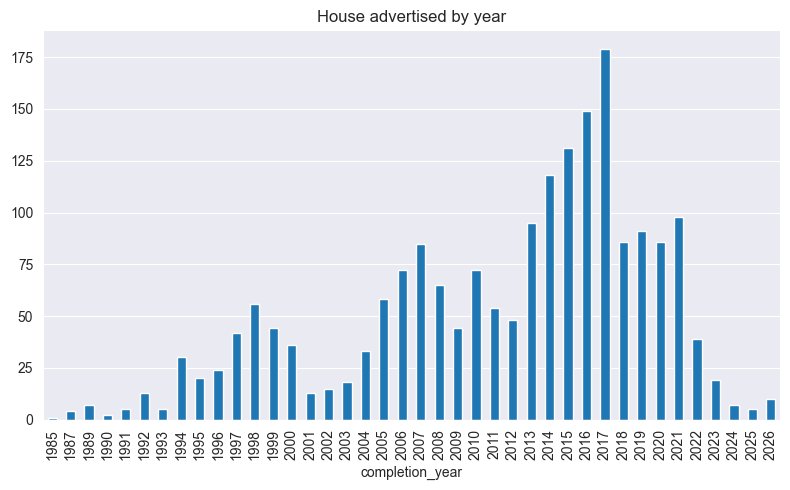

In [555]:
houses_by_year = df_houses.groupby(["completion_year"]).size().reset_index()

#exclude the unknown completion year

houses_by_year.iloc[1:].plot.bar(
    x="completion_year",
    figsize=(8,5),
    legend=False,
    title="House advertised by year"
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis="x",)

In [556]:
# number of occurence for each state
(df_houses
 .groupby("state").size())

#some state has to little information to find avg price, keep only state with more than 10 entries

state
Johor               410
Kedah                 2
Kelantan              1
Kuala Lumpur        720
Labuan                2
Melaka               64
Negeri Sembilan      25
Pahang               17
Penang             1053
Perak                15
Putrajaya            62
Sabah               170
Sarawak             132
Selangor           1326
Terengganu            1
dtype: int64

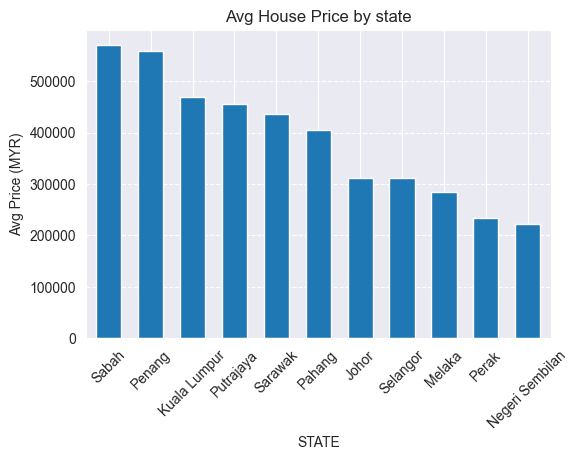

In [557]:
'''Determine number of entries for each state and price avrg. Some state has too little entries, therefore we will remove them as they
might not provide accurate average price, min_entry = 5'''

entry_per_state = df_houses.groupby("state").agg(
 count=("state","size"),
 mean_price=("price","mean"),
 total_price=("price", "sum")
)
# filter down to entries > 5
min_entry = 5

(entry_per_state.loc[entry_per_state["count"] > 5, "mean_price"].sort_values(ascending=False).plot
.bar(
    width=0.6,
    figsize=(6,4),
    ylabel="Avg Price (MYR)",
    xlabel= "STATE",
    title="Avg House Price by state"
    )
)

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle=("--"))

# Sabah score the highest on average for house Price. 

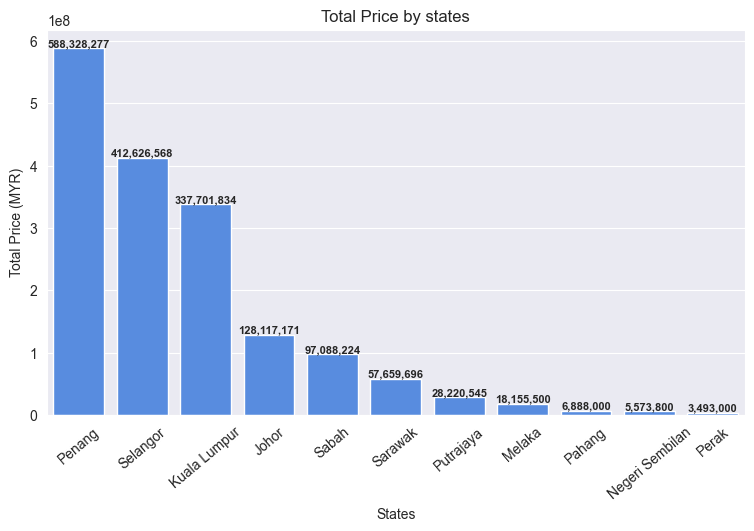

In [558]:
filtered_data1 = entry_per_state.loc[entry_per_state["count"] > 5, "total_price"].sort_values(ascending=False)

fig = plt.subplots(figsize=(9,5))
bars = sns.barplot(x=filtered_data1.index, y=filtered_data1, width=0.8, color="#4287f5")

for index, value in enumerate(filtered_data1):
    plt.text(x=index, y=value, s=f"{value:,.0f}", ha="center", va="bottom", fontsize=8, weight="bold")

plt.xticks(rotation=40)
plt.ylabel("Total Price (MYR)")
plt.xlabel("States")
plt.title("Total Price by states")
plt.show()



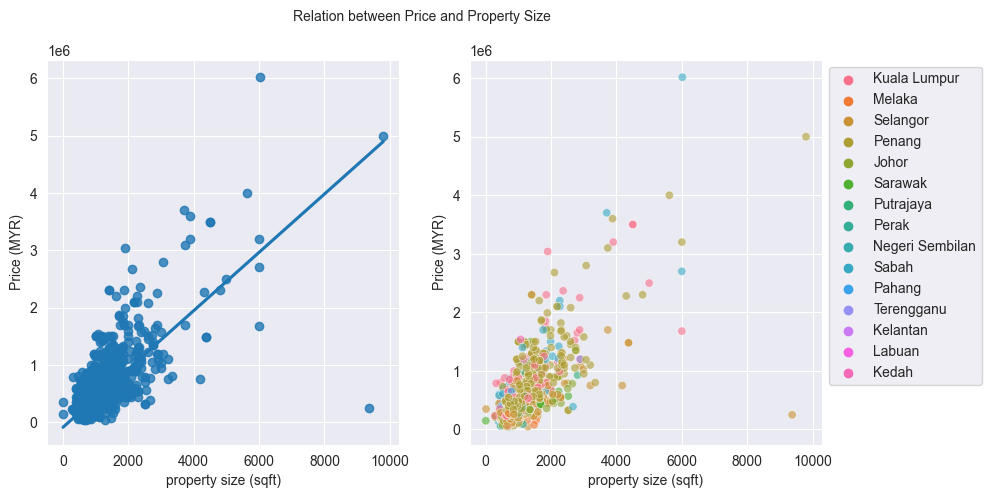

In [572]:
df_houses.head()
# let see the relation between property size and price. lets add color to distinguish state

states_idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

state_idx_mapping = dict(zip(states, states_idx))

filtered_data2 = df_houses.loc[:, ["property_size","price","state"]]

filtered_data2["state_id"] = filtered_data2["state"].map(state_idx_mapping)

# Remove data with housesize more than 10000sqf, high probability they are outliers

filtered_data2 = filtered_data2[filtered_data2["property_size"] < 10000]

fig, axes= plt.subplots(1,2,figsize=(10,5))

sns.regplot(data=filtered_data2, x="property_size", y="price", ci=None, ax=axes[0])
axes[0].set_xlabel("property size (sqft)")
axes[0].set_ylabel("Price (MYR)")

sns.scatterplot(data=filtered_data2, x="property_size", y="price", hue="state", alpha=0.6, ax=axes[1])
axes[1].set_xlabel("property size (sqft)")
axes[1].set_ylabel("Price (MYR)")

fig.suptitle("Relation between Price and Property Size", fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Price incerease as houses size increase

In [560]:
(df_houses
 .groupby("property_type")
 .size())

property_type
Apartment            1494
Condominium          1714
Duplex                  5
Flat                  247
Others                 17
Service Residence     506
Studio                 13
Townhouse Condo         4
dtype: int64

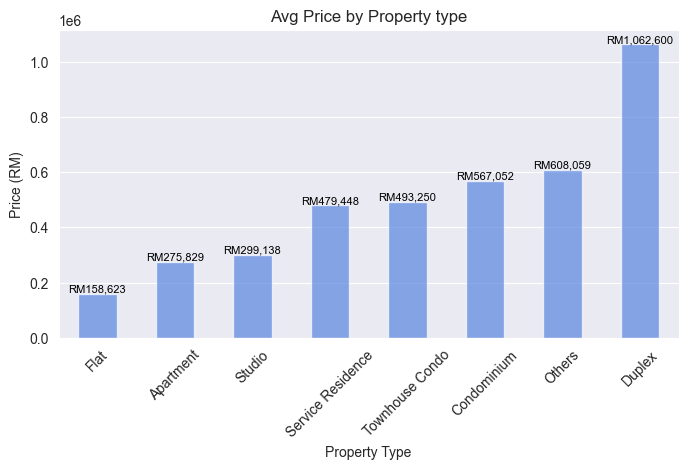

In [561]:
# Let see the relation between price and type of property

filtered_data3 = df_houses.groupby("property_type")[["price"]].mean().reset_index().sort_values("price")


fig, axes = plt.subplots(figsize=(8,4))

bars = sns.barplot(x=filtered_data3["property_type"], 
                   y=filtered_data3["price"], 
                   width=0.5, 
                   alpha=0.7, 
                   color="#427ef5")

for index, value in enumerate(filtered_data3["price"]):
    plt.text(fontsize=8, 
             s=f"RM{value:,.0f}", 
             x=index, y=value, 
             color="black", 
             ha="center", 
             va="bottom")

plt.xticks(rotation=45)
plt.title("Avg Price by Property type")
plt.ylabel("Price (RM)")
plt.xlabel("Property Type")
plt.show()

# Duplex type houses cost the most

In [562]:
df_houses.groupby("land_title").size()

land_title
Bumi Lot           632
Malay Reserved       8
Non Bumi Lot      3360
dtype: int64

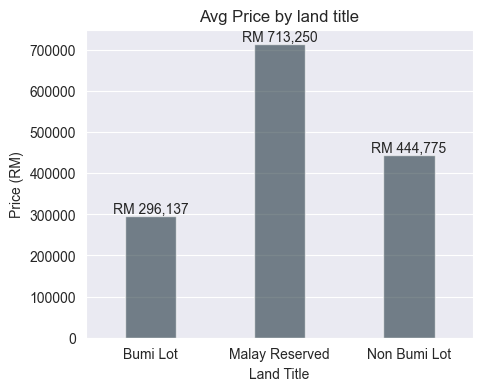

In [564]:
# Mean price by land title

filtered_data4 = df_houses.groupby("land_title")[["price"]].mean().reset_index()

fig, axes = plt.subplots(figsize=(5,4))

bars = sns.barplot(data=filtered_data4, x="land_title", y="price", color="#1c3645", alpha=0.6, width=0.4)

for index, value in enumerate(filtered_data4["price"]):
    plt.text(s=f"RM {value:,.0f}", x=index, y=value, va="bottom", ha="center")

plt.title("Avg Price by land title")
plt.ylabel("Price (RM)"),
plt.xlabel("Land Title")
plt.show()


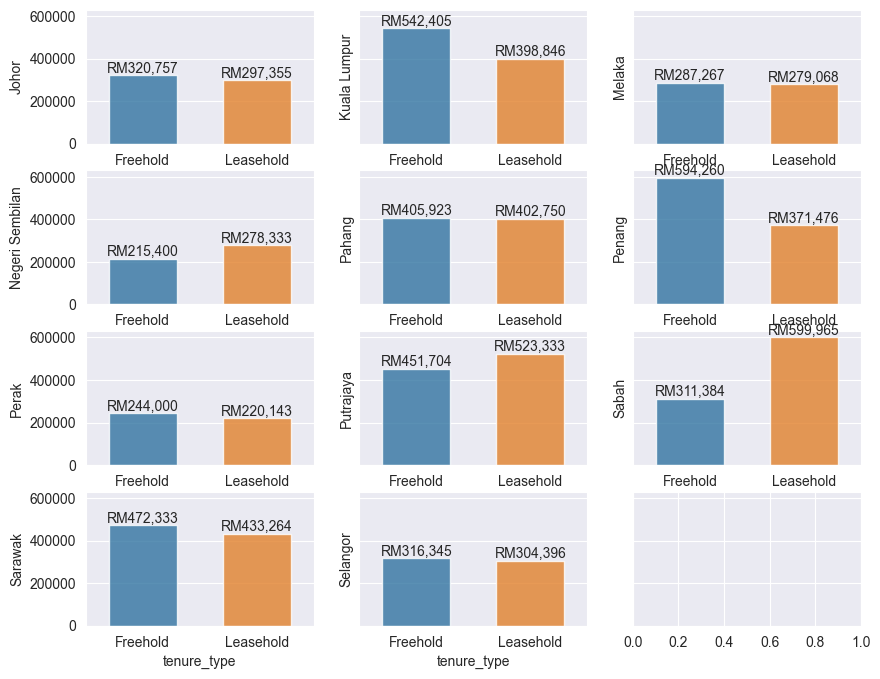

In [568]:
# Let see the mean price between freehold and leasehold houses by states

# Create pivot table for each state
tenure_pivot = (df_houses.loc[:, ["state","tenure_type","price"]]
 .pivot_table(
     index="state",
     columns="tenure_type",
     aggfunc="mean",
     values="price"
 ))

# transpose for easier access
tenure_pivot = tenure_pivot.dropna().transpose()


fig, ax = plt.subplots(4,3, sharex=False, sharey=True, figsize=(10,8))

axes = ax.ravel() #flattened axes

for i in range(len(tenure_pivot.columns)):
    bars = sns.barplot(x=tenure_pivot.index, y=tenure_pivot.iloc[:, i], ax=axes[i], width=0.6, alpha=0.8)
    
    for index, value in enumerate(tenure_pivot.iloc[:, i]):
        axes[i].text(x=index, y=value, ha="center", va="bottom", s=f"RM{value:,.0f}")


# fig.suptitle("Price for Tenure Type in each states")
plt.show()


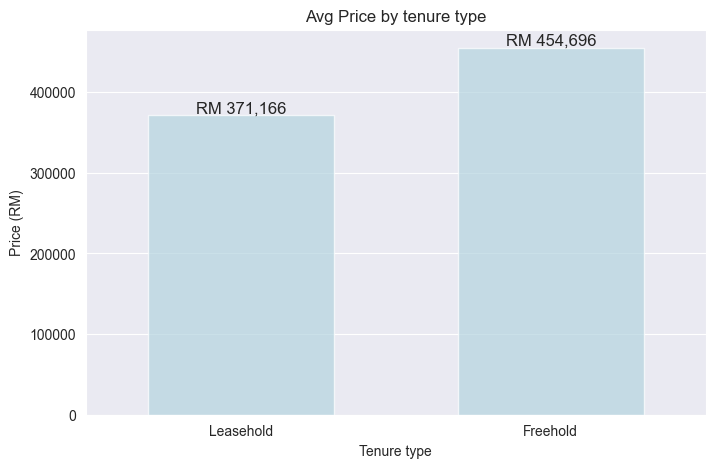

In [ ]:
# Overall price comparison for tenure type

filtered_data5 = df_houses.groupby("tenure_type")[["price"]].mean().sort_values(by="price").reset_index()

fig,axes = plt.subplots(figsize=(8,5))

bars = sns.barplot(data=filtered_data5, x="tenure_type", y="price", alpha=0.7, width=0.6,color="lightblue")

for index, value in enumerate(filtered_data5["price"]):
    plt.text(s=f"RM {value:,.0f}", x=index, y=value, fontsize=12, va="bottom", ha="center", )

plt.title("Avg Price by tenure type")
plt.ylabel("Price (RM)")
plt.xlabel("Tenure type")

plt.show()